## Matrix Factorization Models



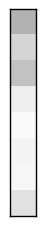

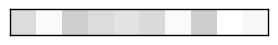

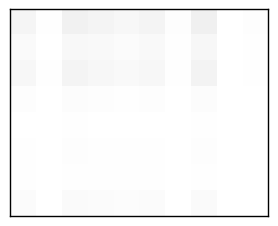

In [22]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def PlotHeatmap(X):
    c = 3.
    plt.figure(figsize=(X.shape[1]/c,X.shape[0]/c))
    plt.imshow(X, interpolation='nearest',vmax=1,vmin=0)
    plt.set_cmap('gray_r')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()    


N = 8
M = 10
R = 1

A = np.random.rand(N,R)**2
A = A/np.sum(A,axis=0)
B = np.random.rand(R,M)**2
B = B/np.sum(B,axis=1).reshape((R,1))
Y = A.dot(B)

PlotHeatmap(A)
PlotHeatmap(B)
PlotHeatmap(Y)



## Singular Value Decomposition

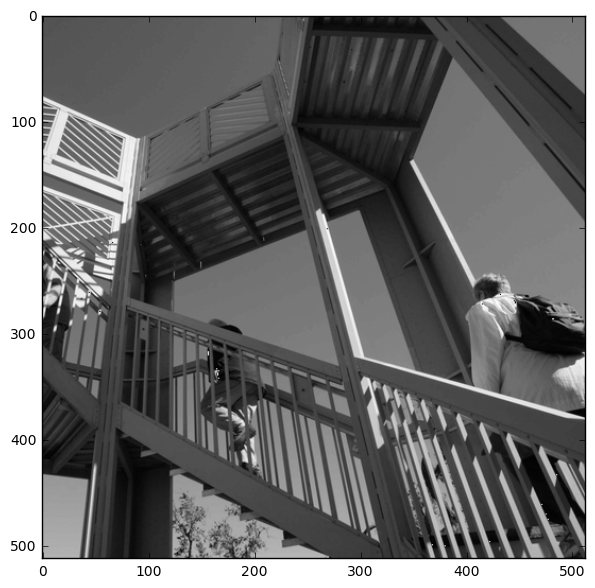

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.linalg as la
import scipy.misc

X = sc.misc.ascent()
fig = plt.figure(figsize=(7,7))
plt.gray()
plt.imshow(X)
plt.show()


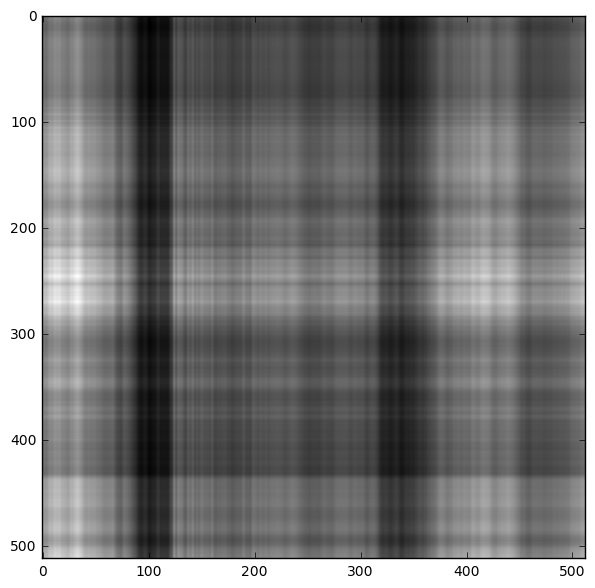

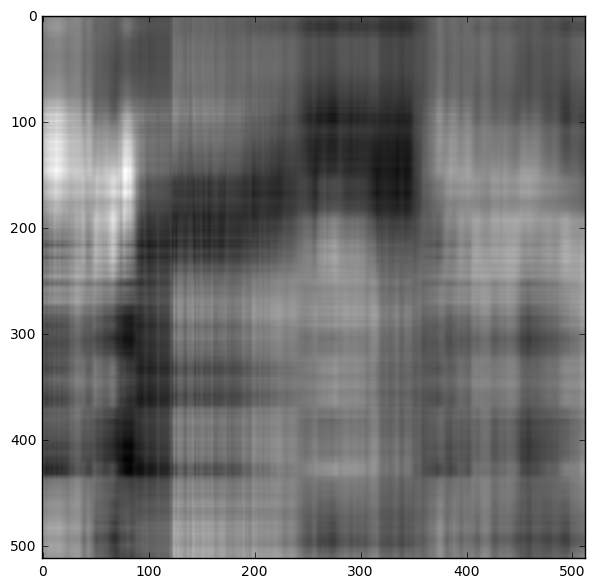

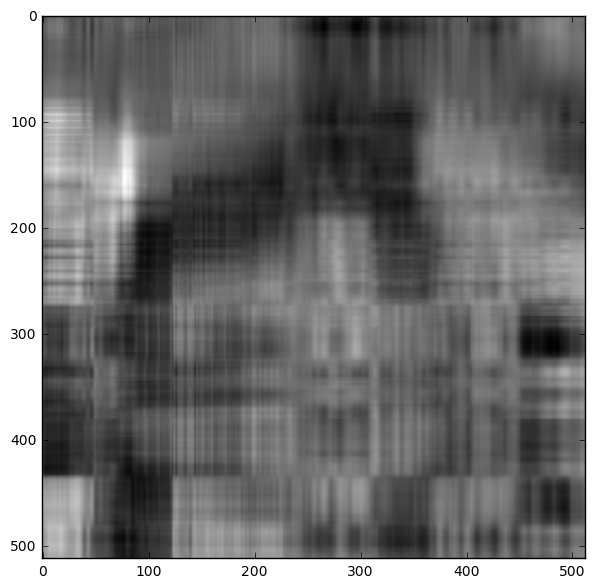

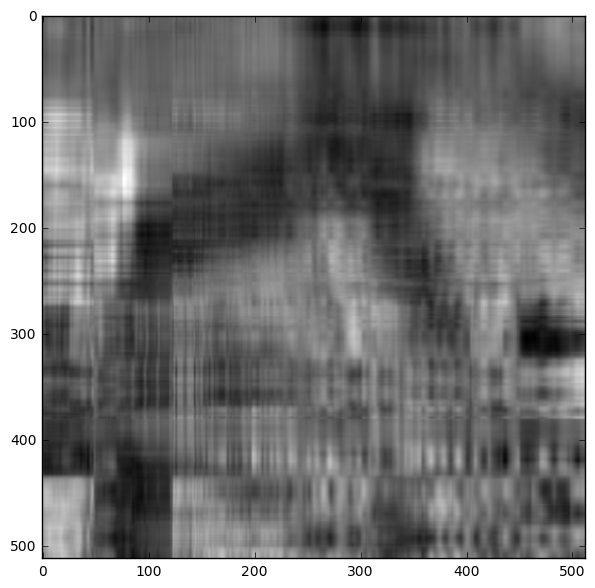

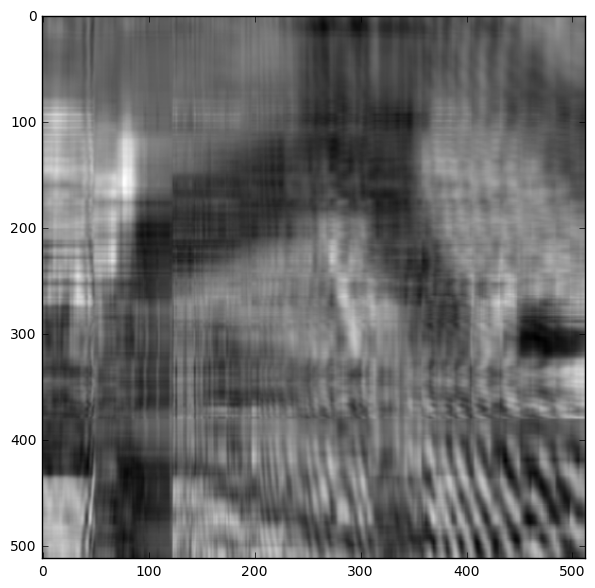

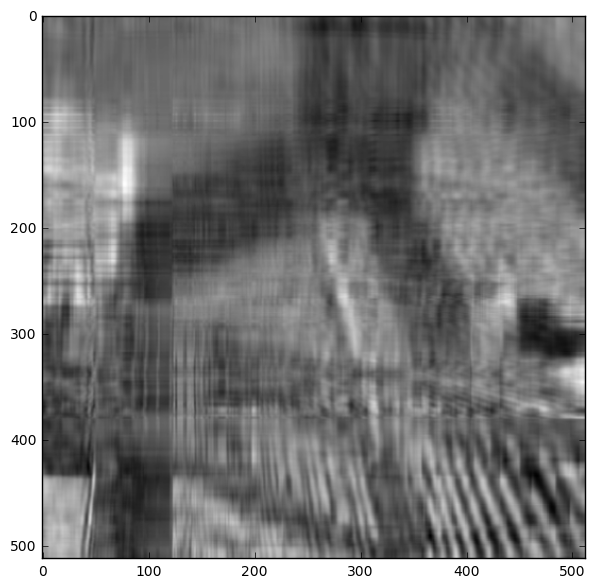

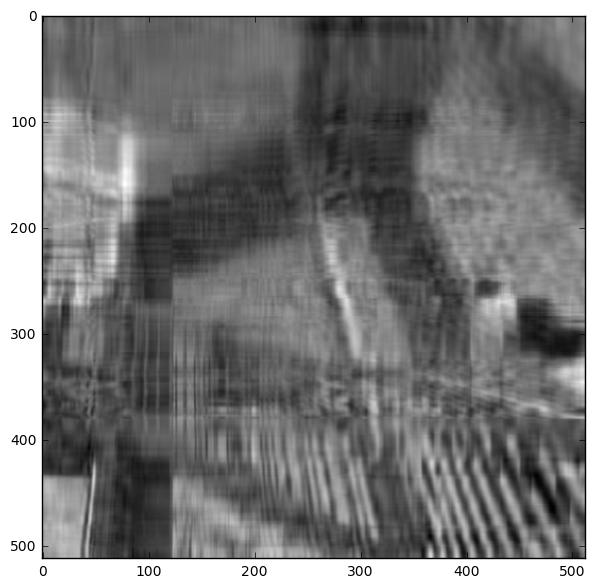

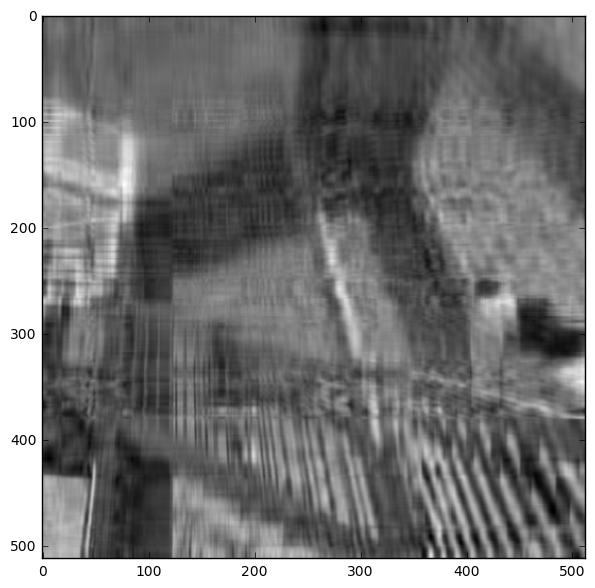

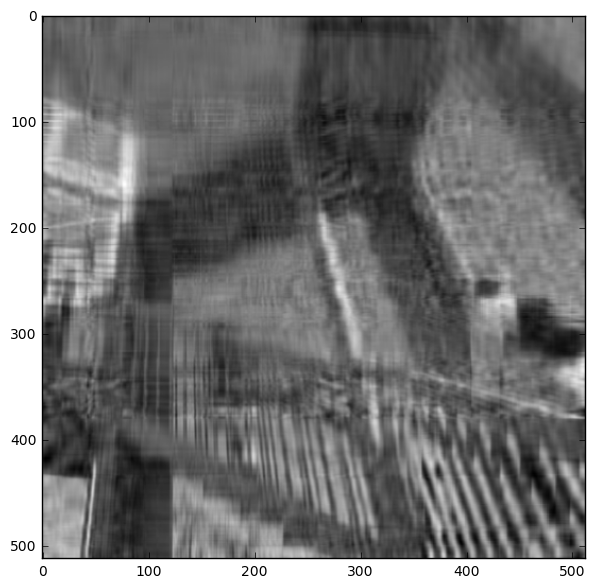

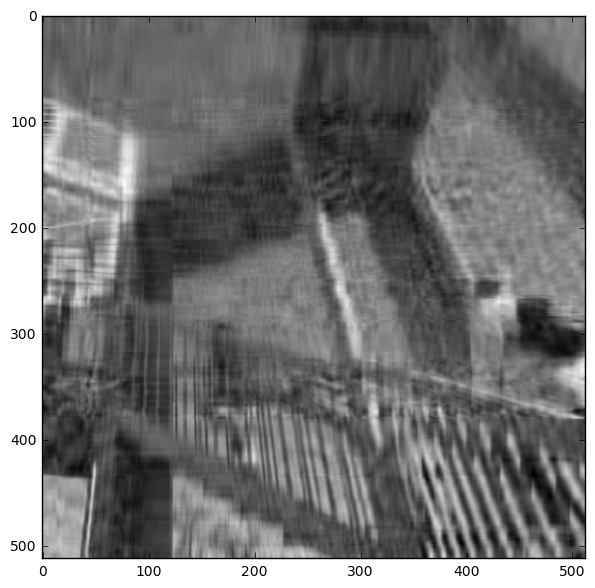

In [9]:
U,S,Vt = la.svd(X)

M,N = X.shape

for rnk in range(1,20,2):
    Sr = np.zeros_like(S)
    Sr[0:rnk] = S[0:rnk]
    Sig = la.diagsvd(Sr, M, N)

    A2 = np.dot(np.dot(U, Sig), Vt)

    fig = plt.figure(figsize=(5,5))
    plt.gray()
    plt.imshow(A2)
    plt.show()

## Recommendation Systems



In [10]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-100k/u.data', sep='\t', header=None, names=rnames)
#ratings

inames = ['movie_id', 'movie_title', 'release_date', 'video_release_date',
        'IMDb_URL','unknown', 'Action', 'Adventure','Animation',
        'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi',
        'Thriller', 'War', 'Western']
items = pd.read_table('data/ml-100k/u.item', sep='|', header=None, names=inames)
#items

unames = ['user_id','age','gender','occupation', 'zip_code']
users = pd.read_table('data/ml-100k/u.user', sep='|', header=None, names=unames)
users


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [2]:
NRows = max(ratings['user_id'])
NCols = max(ratings['movie_id'])


X = np.nan*np.ones((NRows, NCols))

for k in range(len(ratings)):
    i = ratings['user_id'].ix[k]-1
    j = ratings['movie_id'].ix[k]-1
    r = ratings['rating'].ix[k]
    X[i,j] = r

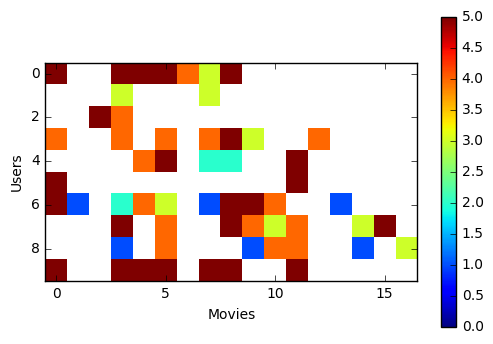

In [4]:
Data = X[6:16,3:20]

plt.imshow(Data, interpolation='nearest',vmax=5,vmin=0)
plt.colorbar()
plt.set_cmap('jet')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()

In [17]:
users.ix[0:100]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
def nmf_kl_multiplicative(D, M, W, H, EPOCH=1):
    
    MD = D.copy()
    MD[M==0] = 0
    for e in range(EPOCH):
        Xhat = W.dot(H)
        W = W*((MD/Xhat).dot(H.T)/np.dot(M, H.T)) 

        Xhat = W.dot(H)
        H = H*(W.T.dot(MD/Xhat)/np.dot(W.T, M))
        
        #print np.sum(np.abs(MD - M*Xhat))/np.sum(M)
    
    return W, H


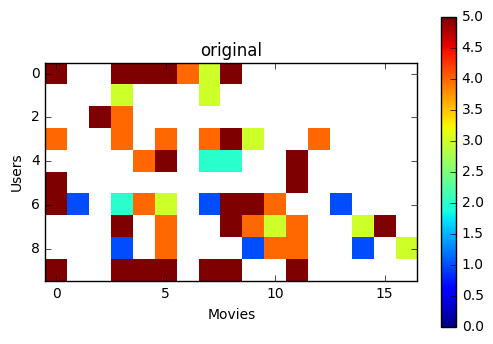

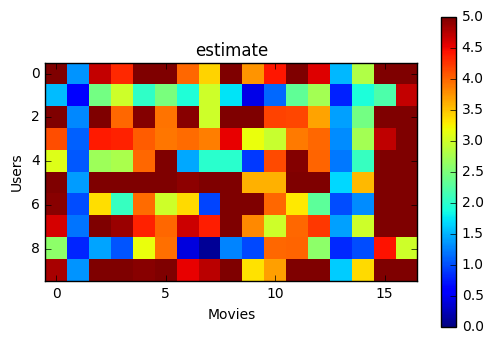

In [8]:
#Rank
R = 3

# Data
Nr = Data.shape[0]
Nc = Data.shape[1]

# Initialize
W = np.random.rand(Nr, R)*100
H = np.random.rand(R, Nc)*100

Mask = np.ones_like(Data)
Mask[np.isnan(Data)] = 0

W,H = nmf_kl_multiplicative(Data, Mask, W, H, EPOCH=1000)
Xhat = W.dot(H)

def ShowMatrix(X, title=''):
    plt.figure()
    plt.imshow(X, interpolation='nearest',vmax=5,vmin=0)
    plt.colorbar()
    plt.set_cmap('jet')
    plt.xlabel('Movies')
    plt.ylabel('Users')
    plt.title(title)
    plt.show()
    
ShowMatrix(Data, 'original')
ShowMatrix(Xhat, 'estimate')


# Last Fm Datatset
https://grouplens.org/datasets/hetrec-2011/

(From the Readme)


## Description
    This dataset contains social networking, tagging, and music artist listening information 
    from a set of 2K users from Last.fm online music system.
    http://www.last.fm 

    The dataset is released in the framework of the 2nd International Workshop on 
    Information Heterogeneity and Fusion in Recommender Systems (HetRec 2011) 
    http://ir.ii.uam.es/hetrec2011 
    at the 5th ACM Conference on Recommender Systems (RecSys 2011)
    http://recsys.acm.org/2011 
-----------
## Data statistics
    * 1892 users
    * 17632 artists
      
    * 12717 bi-directional user friend relations, i.e. 25434 (user_i, user_j) pairs
        * avg. 13.443 friend relations per user
    * 92834 user-listened artist relations, i.e. tuples [user, artist, listeningCount]
        * avg. 49.067 artists most listened by each user
        * avg. 5.265 users who listened each artist
    * 11946 tags  
    * 186479 tag assignments (tas), i.e. tuples [user, tag, artist]
        * avg. 98.562 tas per user
        * avg. 14.891 tas per artist
        * avg. 18.930 distinct tags used by each user
        * avg. 8.764 distinct tags used for each artist
-----------

In [2]:
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

/Users/cemgil/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## ListeningCount of user to artist

In [3]:
# Create ListeningCount(user, artist) data
df = pd.read_csv('./data/hetrec2011-lastfm-2k/user_artists.dat', sep='\t')
userID2idx = {ids: i for i,ids in enumerate(sorted(df['userID'].unique()))}
idx2userID = {i: ids for i,ids in enumerate(sorted(df['userID'].unique()))}

artistID2idx = {ids: i for i,ids in enumerate(sorted(df['artistID'].unique()))}
idx2artistID = {i: ids for i,ids in enumerate(sorted(df['artistID'].unique()))}

NumOfUsers = len(userID2idx)
NumOfArtists = len(artistID2idx)

X_lil = sparse.lil_matrix((NumOfUsers, NumOfArtists))
for rec in df.itertuples():
    i = userID2idx[int(rec[1])]
    j = artistID2idx[int(rec[2])]
    X_lil[i, j] = float(rec[3])
    

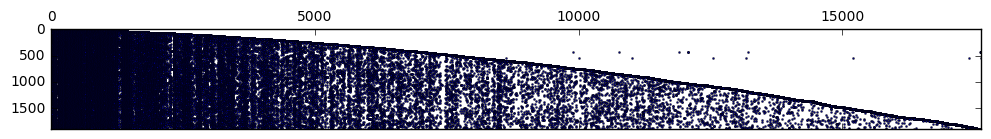

In [4]:
plt.figure(figsize=(12,4))
plt.spy(X_lil[0:,0:],markersize=1)
plt.show()

## Artist names

In [5]:
df = pd.read_csv('./data/hetrec2011-lastfm-2k/artists.dat', sep='\t')

artistID2artistName = {r[1]: r[2] for r in df.ix[:,['id','name']].itertuples()}
artistName2artistID = {r[2]: r[1] for r in df.ix[:,['id','name']].itertuples()}

artistName2artistID

{'Harry Potter Movie Theme': 7254,
 'Alexandra Burke': 915,
 'Los Bunkers': 13603,
 'Juliana Pasha': 6002,
 'Antonio Meliveo': 6030,
 'Back Miller': 7705,
 'Caifanes': 1501,
 'S.O.D.': 4803,
 'Kyte': 4174,
 'The Pretenders': 5550,
 'Esther Phillips': 15772,
 'Everything Is Made in China': 4228,
 'Endstille': 3822,
 'The Duke Spirit': 9484,
 'Foundation': 4148,
 'Empire! Empire! (I Was A Lonely Estate)': 12487,
 'All For Nothing': 10573,
 'Neil Young & Crazy Horse': 9543,
 'Tyra Banks': 4925,
 'And So I Watch You From Afar': 11272,
 'Junior Ferrari': 16072,
 'flood feelings': 18203,
 'Tracktor Bowling': 508,
 'Magda Femme & Iwona W\xc4\x99growska': 9036,
 'Ricki-Lee': 2564,
 'XP8': 1332,
 'SPL': 7958,
 'Malefique': 11365,
 'Bikini Kill': 3744,
 'Peter Horrevorts': 12374,
 'Sister Hazel': 14317,
 'Ania Wyszkoni': 14902,
 'Ceza': 12420,
 'Vibe Tribe': 10544,
 '\xd0\x9a\xd0\xb0\xd1\x81\xd1\x82\xd0\xb0': 2193,
 'Roma Kenga': 11171,
 '\xe5\x9d\x82\xe6\x9c\xac\xe9\xbe\x8d\xe4\xb8\x80': 6075,


In [100]:
# Get artists listened by a user and the listeningCount

i = 1860
uID = idx2userID[i]

print 'User:', uID
a_idx = X_lil[i,:].nonzero()[1]

for j in a_idx:
    print artistID2artistName[idx2artistID[j]], X_lil[i, j] 

User: 2064
Gorillaz 23.0
Muse 28.0
Death Cab for Cutie 68.0
Band of Horses 17.0
Interpol 18.0
Kings of Leon 477.0
The Killers 41.0
Green Day 74.0
P!nk 116.0
Avril Lavigne 24.0
Linkin Park 203.0
Metro Station 17.0
30 Seconds to Mars 25.0
Three Days Grace 16.0
Papa Roach 120.0
Paramore 1130.0
Flyleaf 1458.0
Bullet for My Valentine 139.0
Fall Out Boy 406.0
Ellie Goulding 24.0
Glee Cast 141.0
Florence + the Machine 101.0
Marina & the Diamonds 26.0
Sia 19.0
The Pretty Reckless 243.0
Bring Me The Horizon 145.0
Atreyu 40.0
Boys Like Girls 25.0
The Kooks 19.0
Pink 73.0
Editors 21.0
Asking Alexandria 265.0
Black Rebel Motorcycle Club 26.0
Metric 17.0
Breaking Benjamin 177.0
In This Moment 127.0
We Butter The Bread With Butter 214.0
Automatic Loveletter 18.0
Eyes Set to Kill 312.0
Silversun Pickups 30.0
The Bravery 23.0
Sylvester 17.0
Sea Wolf 19.0
Callejón 47.0
Robert Francis 291.0
Bakkushan 49.0
Bon Iver & St. Vincent 49.0
Boy 29.0
Hurricane Bells 19.0
John James 17.0


In [7]:
# Users listening to an artist 
artistName = 'Morrissey'
j = artistID2idx[artistName2artistID[artistName]]

idx = X_lil[:,j].nonzero()[0]
for i in idx:
    print idx2userID[i]


94
100
141
142
183
215
237
290
369
428
436
462
540
560
596
622
665
694
728
764
917
925
1075
1087
1202
1210
1232
1240
1244
1255
1276
1303
1316
1337
1354
1375
1389
1424
1427
1463
1486
1496
1498
1506
1518
1541
1594
1653
1685
1732
1746
1815
1852
1861
1905
1922
1929
1958
1992
2014


## Most popular artists by Times Listened

In [74]:
sm = np.array(np.sum(X_lil, axis=0))[0]
idx_sorted = np.array(sm.argsort())

for i in reversed(idx_sorted[-300:]):
    print artistID2artistName[idx2artistID[i]],sm[i]
    

Britney Spears 2393140.0
Depeche Mode 1301308.0
Lady Gaga 1291387.0
Christina Aguilera 1058405.0
Paramore 963449.0
Madonna 921198.0
Rihanna 905423.0
Shakira 688529.0
The Beatles 662116.0
Katy Perry 532545.0
Avril Lavigne 525844.0
Taylor Swift 525292.0
Evanescence 513476.0
Glee Cast 506453.0
Beyoncé 499318.0
U2 493024.0
Miley Cyrus 489065.0
30 Seconds to Mars 485532.0
Muse 485076.0
Pink Floyd 466104.0
Kylie Minogue 449292.0
Radiohead 385306.0
Ke$ha 384405.0
Mariah Carey 384307.0
Metallica 371916.0
Iron Maiden 368710.0
Thalía 350035.0
Duran Duran 348919.0
Coldplay 330757.0
Eminem 321011.0
Blur 318221.0
Michael Jackson 296882.0
Arctic Monkeys 288520.0
System of a Down 277397.0
Linkin Park 265362.0
Kelly Clarkson 253027.0
Pearl Jam 251440.0
Placebo 245878.0
In Flames 237148.0
All Time Low 215777.0
Amy Winehouse 213103.0
P!nk 207761.0
a-ha 205195.0
Led Zeppelin 203665.0
Björk 202178.0
Avenged Sevenfold 200949.0
Justin Bieber 200027.0
The Killers 191979.0
Nirvana 190232.0
Black Eyed Peas 188

## Tags 

In [8]:
df = pd.read_csv('./data/hetrec2011-lastfm-2k/tags.dat', sep='\t')
tagName2tagID = {rec[2]: rec[1] for rec in df.itertuples()}
tagID2tagName = {rec[1]: rec[2] for rec in df.itertuples()}

tagID2idx = { tid: num for num,tid in enumerate(sorted(tagID2tagName.keys()))}
idx2tagID = { num: tid for num,tid in enumerate(sorted(tagID2tagName.keys()))}

NumOfTags = len(tagID2tagName)
NumOfTags

11946

## Tag Assignments by user to artist

In [9]:
df = pd.read_csv('./data/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat', sep='\t')
df

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000
5,2,63,13,1238536800000
6,2,63,14,1238536800000
7,2,63,23,1238536800000
8,2,63,40,1238536800000
9,2,73,13,1238536800000


In [10]:
new_artists = set()

for r in df.itertuples():
    if not artistID2idx.has_key(r[2]):
        new_artists.add(r[2])


nextArtistID = NumOfArtists

for u in new_artists:
    if not artistID2artistName.has_key(u):
        name = "Unknown_"+str(u)
        print name,u
        artistID2artistName[u] = name
        artistName2artistID[name] = u
        artistID2idx[u] = nextArtistID
        idx2artistID[nextArtistID] = u
        nextArtistID += 1


Unknown_14338 14338
Unknown_14 14
Unknown_12303 12303
Unknown_16400 16400
Unknown_16401 16401
Unknown_12307 12307
Unknown_29 29
Unknown_33 33
Unknown_35 35
Unknown_14377 14377
Unknown_10283 10283
Unknown_10285 10285
Unknown_14382 14382
Unknown_10287 10287
Unknown_16433 16433
Unknown_10290 10290
Unknown_10293 10293
Unknown_18487 18487
Unknown_10298 10298
Unknown_18492 18492
Unknown_18493 18493
Unknown_18496 18496
Unknown_14402 14402
Unknown_18502 18502
Unknown_18503 18503
Unknown_14411 14411
Unknown_18509 18509
Unknown_12302 12302
Unknown_14422 14422
Unknown_14423 14423
Unknown_14426 14426
Unknown_14427 14427
Unknown_14428 14428
Unknown_14429 14429
Unknown_16478 16478
Unknown_16481 16481
Unknown_14434 14434
Unknown_14440 14440
Unknown_6256 6256
Unknown_18565 18565
Unknown_18566 18566
Unknown_18567 18567
Unknown_15553 15553
Unknown_16536 16536
Unknown_16539 16539
Unknown_16540 16540
Unknown_16545 16545
Unknown_16546 16546
Unknown_16547 16547
Unknown_16549 16549
Unknown_18598 18598
Unknow

In [83]:
NumOfArtistsExtended = len(artistID2artistName)

TG = {(userID2idx[r[1]],artistID2idx[r[2]], tagID2idx[r[3]]): 1 for r in df.itertuples()}

ArtistTimesTagged = sparse.lil_matrix((NumOfArtistsExtended, NumOfTags))

for k in TG.iterkeys():
    i = k[1]
    j = k[2]
    ArtistTimesTagged[i,j] += 1


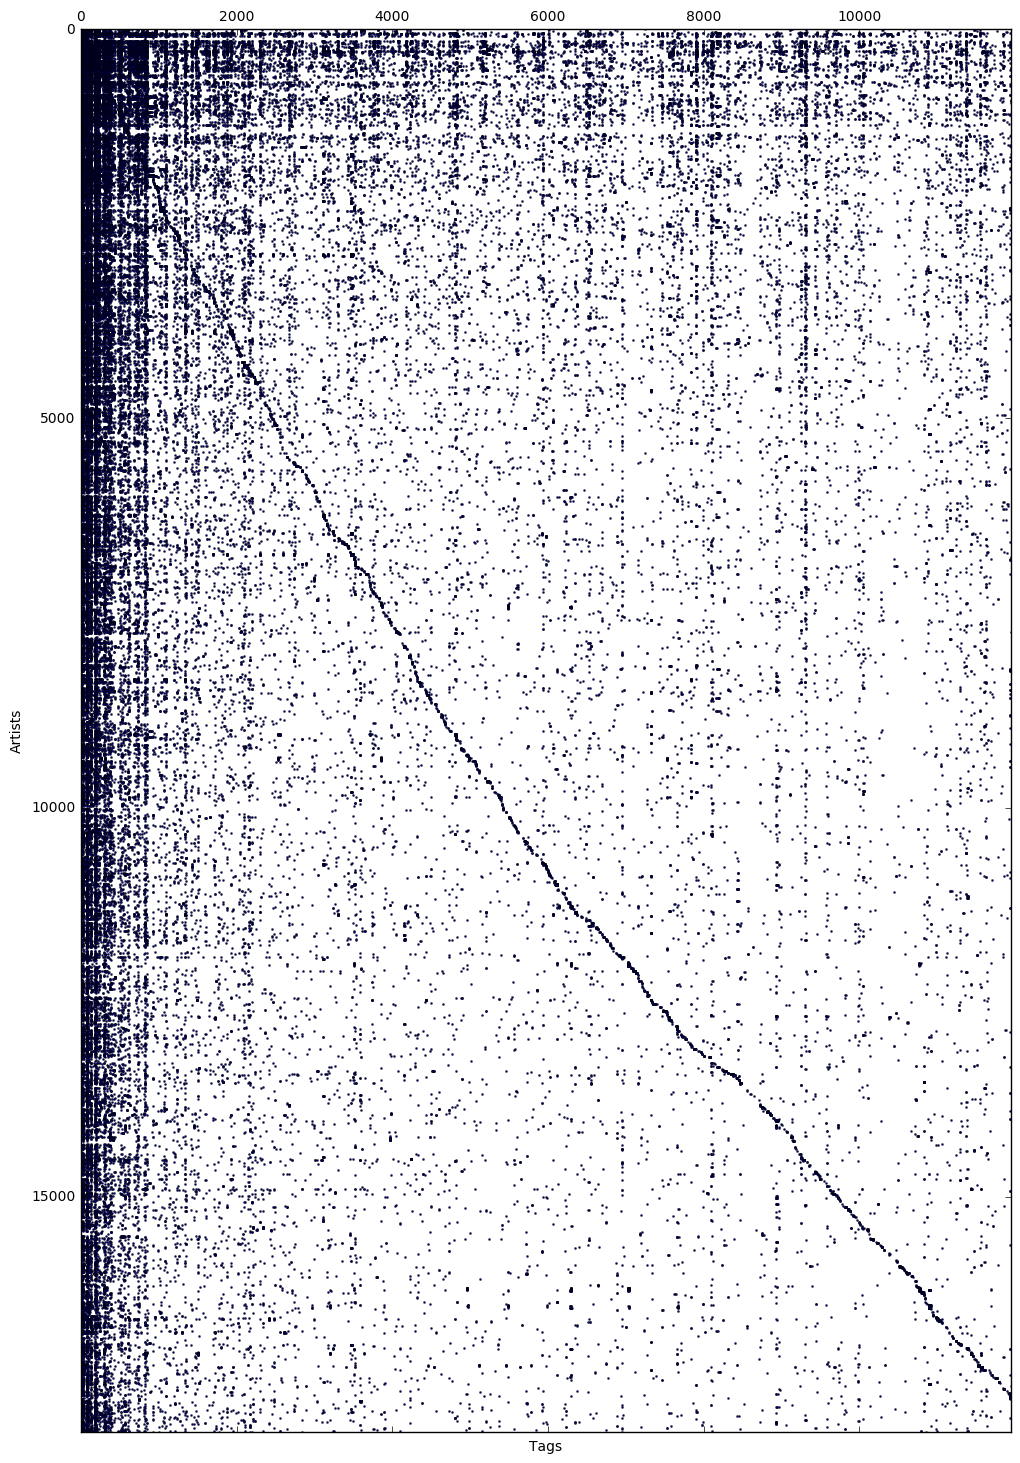

In [87]:
plt.figure(figsize=(12,20))
plt.spy(ArtistTimesTagged[0:,0:],markersize=1)
plt.ylabel('Artists')
plt.xlabel('Tags')
plt.show()

## Tags of an artist

In [122]:
#i = artistID2idx[artistName2artistID['Brad Mehldau']]
#i = artistID2idx[artistName2artistID['Baba Zula']]
#i = artistID2idx[artistName2artistID['Britney Spears']]
#i = artistID2idx[artistName2artistID['Kurban']]
#i = artistID2idx[artistName2artistID['Nancy Sinatra']]
i = artistID2idx[artistName2artistID['Nancy Sinatra']]
aID = idx2artistID[i]

print 'Artist:', artistID2artistName[aID]

tag_idx = ArtistTimesTagged[i,:].nonzero()[1]

for j in tag_idx:
    print tagID2tagName[idx2tagID[j]], ArtistTimesTagged[i, j] 

Artist: Nancy Sinatra
pop 3.0
80s 1.0
female vocalist 1.0
rock 2.0
female vocalists 6.0
soundtrack 2.0
classic rock 4.0
country 1.0
amazing 1.0
60s 7.0
gay 1.0
oldies 2.0
70s 1.0
rain 1.0
the beatles 1.0
cool 1.0
sixties 1.0
politeconomist realife soundtrack 1.0
james bond 1.0
kill bill 1.0
full metal jacket 1.0
1966 1.0
1968 1.0
i love my dad taste 1.0
q sexy 1.0
girlamazing 1.0


In [76]:
print(NumOfArtists)
len(artistID2artistName)

17632


18022

## Social Network

In [12]:
df = pd.read_csv('./data/hetrec2011-lastfm-2k/user_friends.dat', sep='\t')
SN = {(userID2idx[r[1]],userID2idx[r[2]]): 1 for r in df.itertuples()}

In [150]:
import time

timestamp = 1241128800000
time.strftime("%a %d %b %Y %H:%M:%S GMT", time.gmtime(timestamp/1000))

'Thu 30 Apr 2009 22:00:00 GMT'